# Vivarium Interface Demo

This notebook demonstrates the usage of the Vivarium Python API for building, verifying, and saving composite process-bigraph simulations. It includes examples of initializing a simulation, running it, retrieving results, and generating visual diagrams.

In [53]:
from vivarium import Vivarium
from vivarium.tests import DEMO_PROCESSES  # toy processes

In [54]:
# initialize a Vivarium object
v = Vivarium(processes=DEMO_PROCESSES)

In [55]:
# view the available types
print('TYPES:')
v.print_types()

TYPES:
['', 'luminosity/length^2', 'integer', 'length^2*mass/time^2', 'protocol', 'temperature', 'length*temperature', '/substance', 'length^2*mass/current^2*time^3', '/time', 'union', 'current*time/substance', 'step', 'current^2*time^4/length^2*mass', 'current*length^2*time', 'time/length', 'interval', 'mass/current*time^2', 'float', '/temperature*time', 'edge', 'current^2*time^3/length^2*mass', 'any', 'wires', '/printing_unit', 'length^3/mass*time^2', 'current*time/mass', 'length^2*mass/time^3', 'number', 'length', 'length*mass/current*time^3', 'length/time^2', '/length', 'current*length*time', 'current*length^2', 'length^0_5*mass^0_5', 'length^2*mass/substance*temperature*time^2', 'length^3/time', 'mass/length', 'mass/length*time', 'printing_unit', 'current^2*time^4/length^3*mass', 'boolean', 'length*mass/current^2*time^2', 'substance/time', 'length^3', 'process', 'length^1_5*mass^0_5/time^2', 'length^2*mass/current^2*time^2', 'array', 'maybe', 'length*mass/time^2', 'mass', 'length^

In [56]:
# view the type schema for 'string'
print("TYPE INFO for 'string':")
v.access_type('string')

TYPE INFO for 'string':


{'_type': 'string',
 '_default': '',
 '_check': 'check_string',
 '_apply': 'replace',
 '_serialize': 'serialize_string',
 '_deserialize': 'deserialize_string',
 '_dataclass': 'dataclass_string',
 '_description': '64-bit integer'}

In [57]:
# view the available processes
print('PROCESSES:')
v.print_processes()

PROCESSES:
['increase float', 'ram-emitter', 'console-emitter', 'composite']


In [58]:
# inspect the config schema for the 'increase' process
print("CONFIG SCHEMA for 'increase' process:")
print(v.process_schema('increase float'))

CONFIG SCHEMA for 'increase' process:
(rate:float)


In [59]:
# inspect the process interface (inputs/outputs) for the 'increase' process
print("INTERFACE SCHEMA for 'increase' process:")
print(v.process_interface('increase float'))

INTERFACE SCHEMA for 'increase' process:
{'inputs': {'amount': {'_type': 'float', '_default': 1.0}}, 'outputs': {'amount': 'float'}}


In [60]:
# add an increase process called 'increase process'
v.add_process(name='increase',
              process_id='increase float',  # this is the process id
              config={'rate': 0.1},         # set according to the config schema
              )

# print the current state
v

Vivarium( 
{ 'global_time': 0.0,
  'increase': { 'address': 'local:increase float',
                'config': {'rate': 0.1},
                'inputs': {},
                'instance': <vivarium.tests.IncreaseFloat object at 0x117db9af0>,
                'interval': 1.0,
                'outputs': {}}})

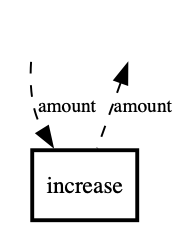

In [61]:
# display as a diagram
v.diagram(dpi='140')

In [62]:
# connect the 'increase' process to the state through its inputs and outputs
v.connect_process(
    process_name='increase',
    inputs={'amount': ['top', 'A']},
    outputs={'amount': ['top', 'A']}
)

# display the current state
v

Vivarium( 
{ 'global_time': 0.0,
  'increase': { 'address': 'local:increase float',
                'config': {'rate': 0.1},
                'inputs': {'amount': ['top', 'A']},
                'instance': <vivarium.tests.IncreaseFloat object at 0x117db9af0>,
                'interval': 1.0,
                'outputs': {'amount': ['top', 'A']}},
  'top': {'A': 1.0}})

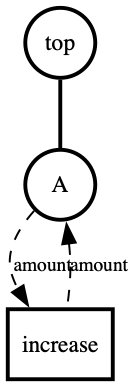

In [63]:
# display the current state as a diagram
v.diagram(dpi='140')

In [64]:
# get the value of 'top.A'
v.get_value(path=['top', 'A'])

1.0

In [65]:
# set value of 'top.A' to 100
v.set_value(path=['top', 'A'], value=100.0)
v.get_value(path=['top', 'A'])

100.0

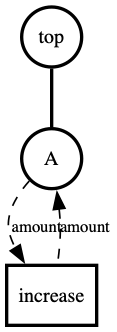

In [66]:
# add an emitter to save the history
v.add_emitter()

# display the current state
v.diagram(dpi='120')

In [67]:
# run the simulation for 10 time units
v.run(interval=10)

In [68]:
# get the timeseries results
timeseries = v.get_timeseries(significant_digits=6)
timeseries

{'global_time': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
 'top.A': [100.0,
  110.0,
  121.0,
  133.1,
  146.41,
  161.051,
  177.1561,
  194.87171,
  214.358881,
  235.794769,
  259.374246]}

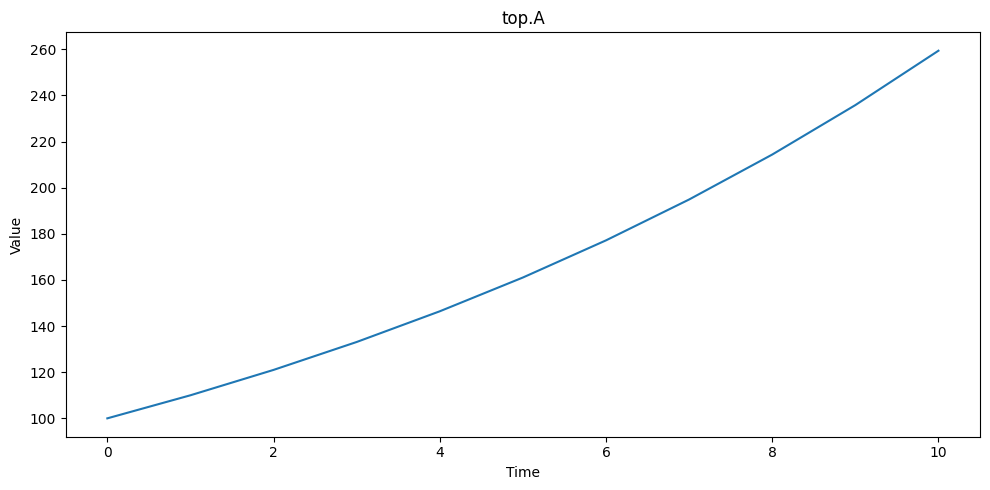

In [69]:
v.plot_timeseries()

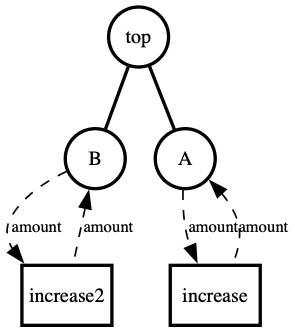

In [70]:
# add more objects
v.add_object(name='B', path=['top'], value=1)

# add another increase process
v.add_process(name='increase2',
              process_id='increase float',
              config={'rate': -0.1},
              inputs={'amount': ['top', 'B']},
              outputs={'amount': ['top', 'B']}
              )

# display the current state
v.diagram(dpi='120')

# Save and Load

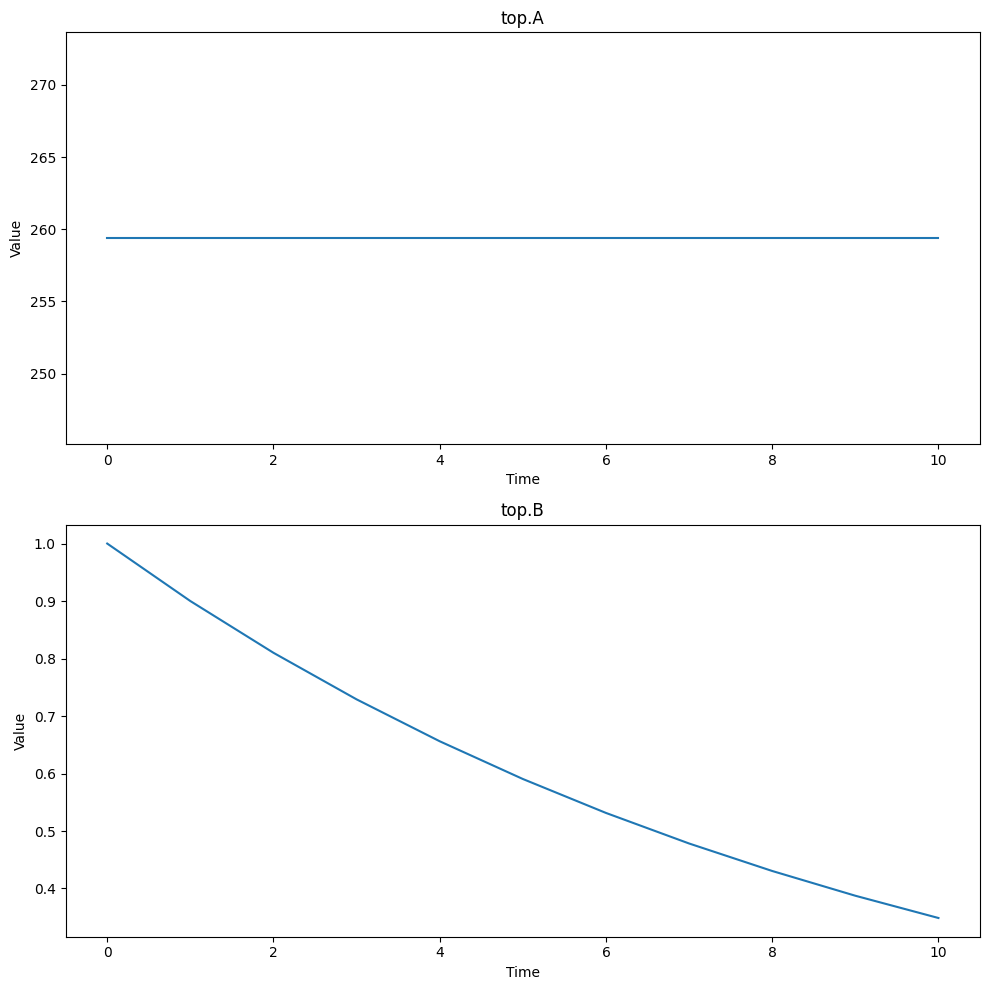

In [71]:
# run the simulation for 10 time units
v.set_value(path=['global_time'], value=0.0)
v.run(interval=10)
v.plot_timeseries()

In [72]:
# save the current state to a file
v.save(filename='demo1')

Saved file: out/demo1.json


In [73]:
# make a new Vivarium object (v2) from the saved file
v2 = Vivarium(document='out/demo1.json', processes=DEMO_PROCESSES)

# add another object and process
v2.add_object(name='C', path=['top'], value=1)
v2.add_process(name='increase3',
              process_id='increase float',
              config={'rate': -0.1},
              inputs={'amount': ['top', 'C']},
              outputs={'amount': ['top', 'C']}
              )

# display the current state as a diagram
v2.diagram(dpi='120',         
           show_values=True,
           # show_types=True,
           )

error deserializing local:increase float with schema {'_default': '', '_apply': 'apply_units', '_check': 'check_units', '_serialize': 'serialize_units', '_deserialize': 'deserialize_units', '_description': 'type to represent values with scientific units', '_type': ''} using deserialize_units
error deserializing {'interval': '1.0', 'address': 'local:increase float', 'config': {}} with schema {'interval': {'_type': 'any', '_default': 'default_any', '_slice': 'slice_any', '_apply': 'apply_any', '_check': 'check_any', '_sort': 'sort_any', '_generate': 'generate_any', '_serialize': 'serialize_any', '_deserialize': 'deserialize_any', '_dataclass': 'dataclass_any', '_resolve': 'resolve_any', '_fold': 'fold_any', '_bind': 'bind_any', '_divide': 'divide_any', '_graphviz': 'graphviz_any'}, 'address': {'_default': '', '_apply': 'apply_units', '_check': 'check_units', '_serialize': 'serialize_units', '_deserialize': 'deserialize_units', '_description': 'type to represent values with scientific uni

UndefinedUnitError: 'local' is not defined in the unit registry